# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
import joblib
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('data/real_estate.csv')
data

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

### Data Exploring

Apparently, all the columns used for the prediction are numeric. Now, we'll use the method describe to know more about our numeric columns.

In [5]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


There are not column with NAN values. So, we are going to visualize the distributions of the features and label columns.

It could say that column **transit_distance** has a very high standard deviation compared with its mean. But, let's see the distribution in all columns.

#### Label Column Distribution

In [6]:
def show_distribution(df, col):
    fig, ax = plt.subplots(2, 1, figsize = (9,6))
    feature = df[col]
    
    feature.hist(bins=100, ax = ax[0])
    ax[0].axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[0].axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax[0].set_title(col)
    
    ax[1].boxplot(feature, vert=False)
    ax[1].set_xlabel('Box Plot')
    
    plt.show()

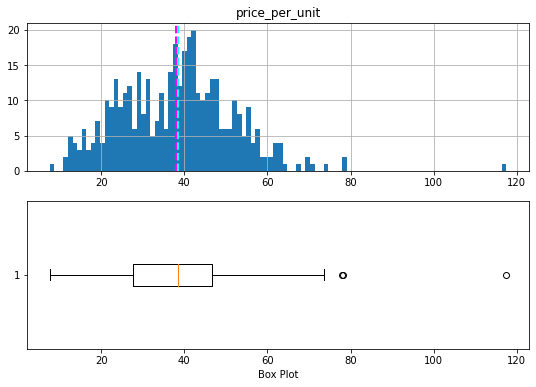

In [7]:
cols = ['price_per_unit']

for c in cols:
    show_distribution(data, c)

The label column seems to have a normal distribution, but has some outliers.

#### Features Distribution

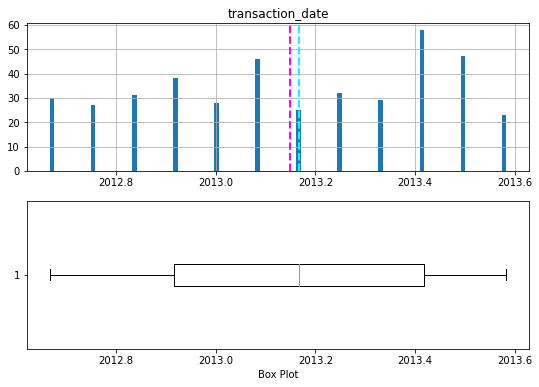

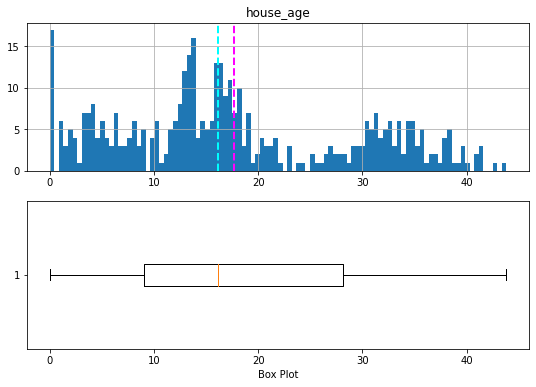

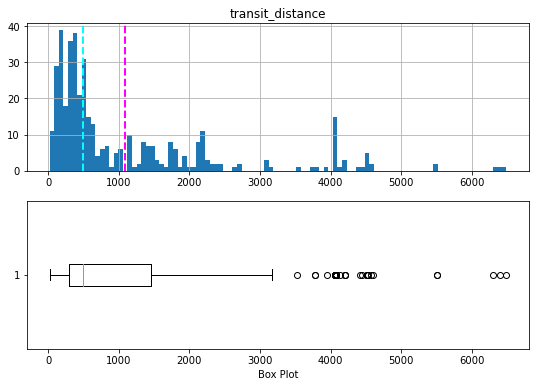

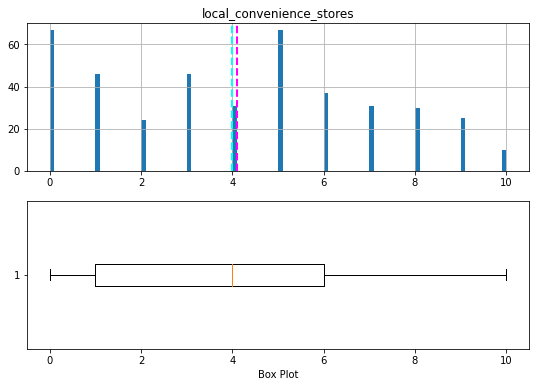

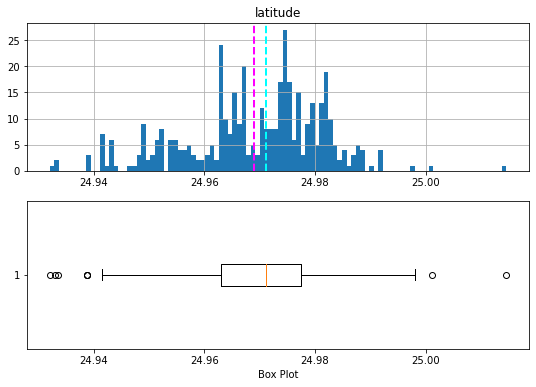

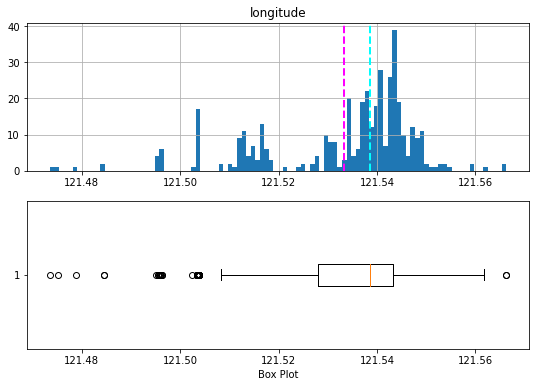

In [8]:
%matplotlib inline

cols = ['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']

for c in cols:
    show_distribution(data, c)

Certainly, label column **price_per_unit** could be presenting outliers values higher than 75, which will be removed.

#### Outliers Removal

In [9]:
df = data[(data['price_per_unit'] < 75)]

In [10]:
df

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


Let's see the label column distribution again...

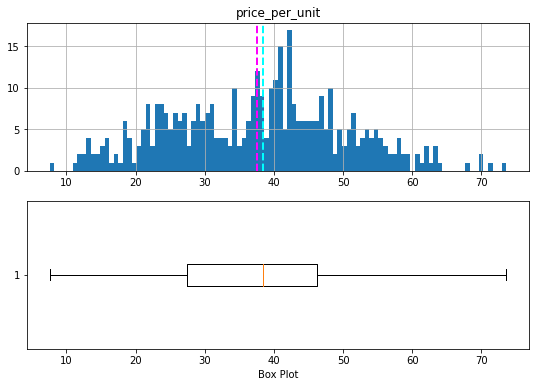

In [11]:
cols = ['price_per_unit']

for c in cols:
    show_distribution(df, c)

Let's see the features distributions again...

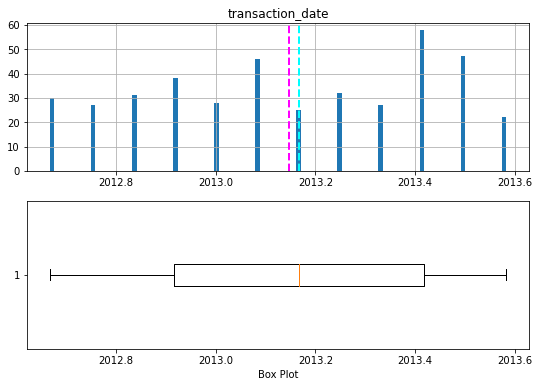

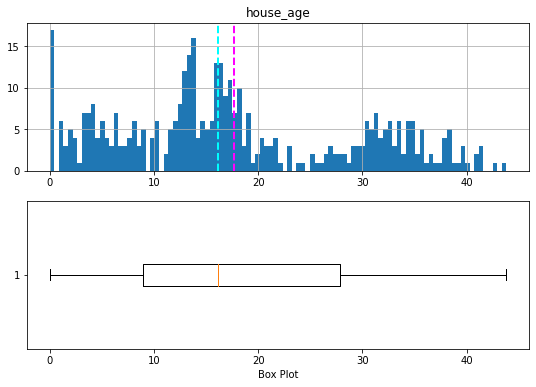

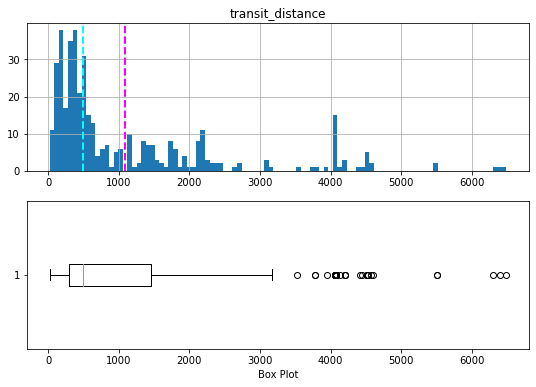

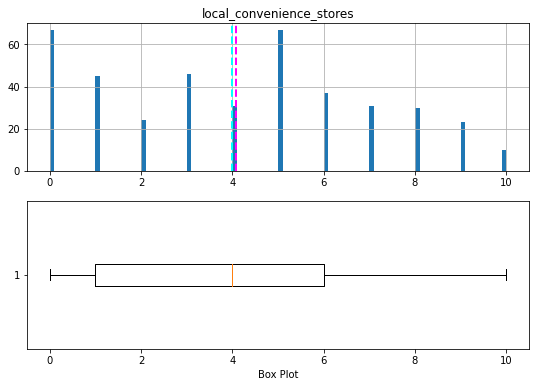

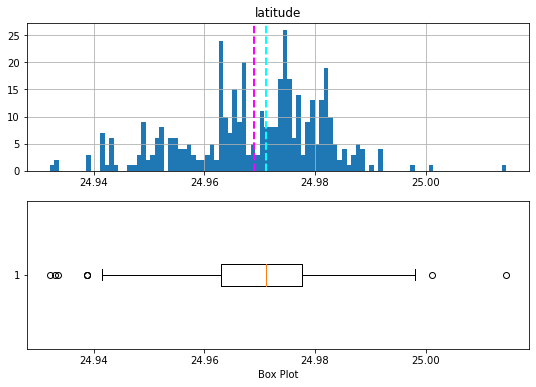

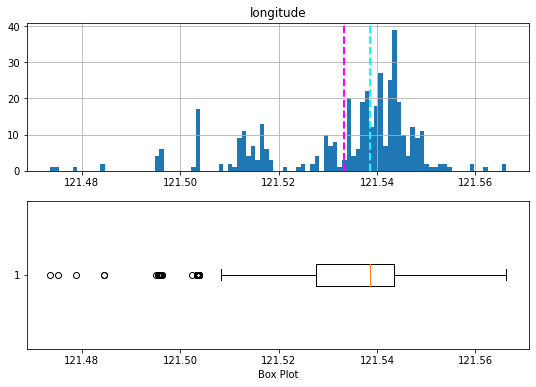

In [12]:
%matplotlib inline

cols = ['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']

for c in cols:
    show_distribution(df, c)

The label and features distributions seem to have a better behavior. Now, we are going to see the correlation between our features and label.

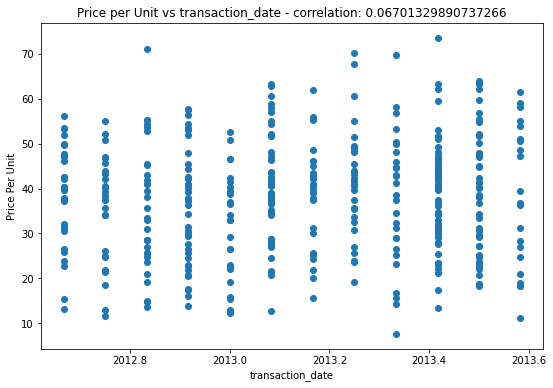

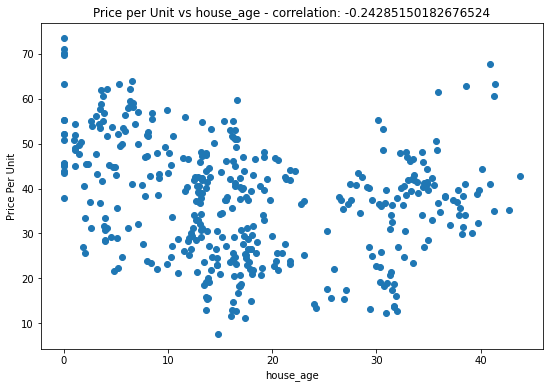

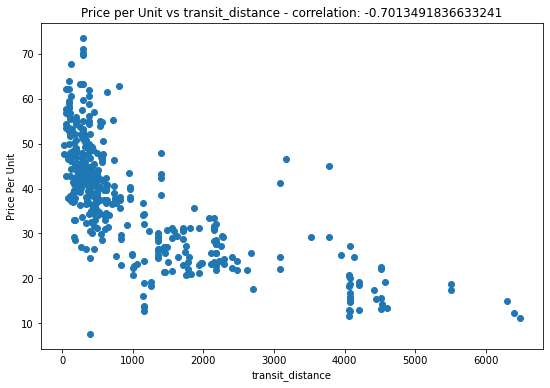

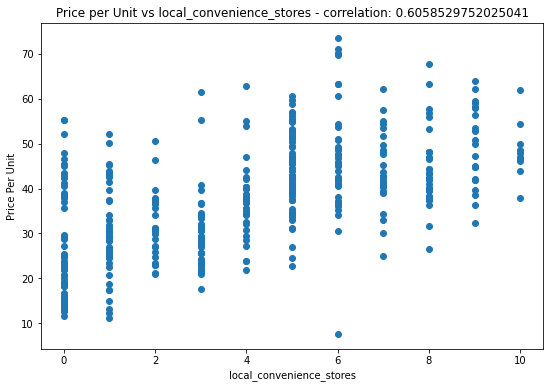

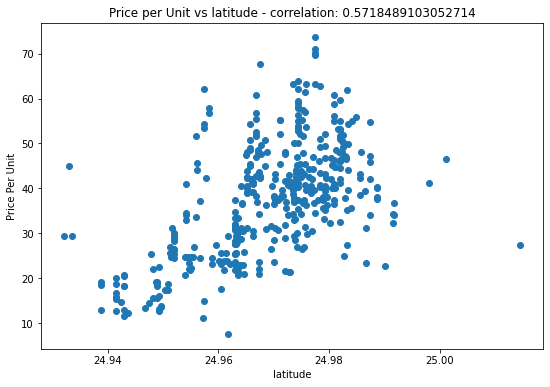

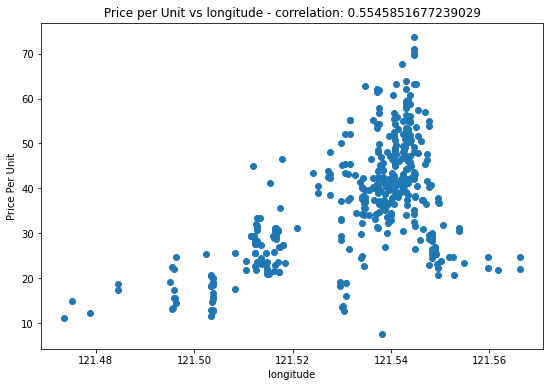

In [13]:
for col in cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price Per Unit')
    ax.set_title('Price per Unit vs ' + col + ' - correlation: ' + str(correlation))
plt.show()

Any of the features columns seems to be strongly correlated to the label column. In this case, we'll leave out the colum **transaction_date** to make predictions for having the lowest correlation. 

Now, we are going to do the data partition to start with the model training and testing stages.

But before the model training and testing stages, the features are going to be scaled to make the learning easy for the model.

In [14]:
df.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')

### Data Scaling

In [15]:
numeric_features = df[['house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']].values

scaler = StandardScaler()
scaler.fit(numeric_features)
X = scaler.transform(numeric_features)
y = df[['price_per_unit']].values

### Data Partitioning

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 287 rows
Test Set: 124 rows


### Model Training and Testing

In [17]:
model = LinearRegression().fit(X_train, y_train)
print (model)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

LinearRegression()
MSE: 53.41413035924781
RMSE: 7.308497134106834
R2: 0.6221831086300209


In [18]:
model = Lasso().fit(X_train, y_train)
print (model)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

Lasso()
MSE: 55.802943614138336
RMSE: 7.47013678684255
R2: 0.6052861940503775


In [19]:
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

DecisionTreeRegressor()
MSE: 54.41415098566309
RMSE: 7.376594809643748
R2: 0.615109611751256


In [20]:
model = RandomForestRegressor().fit(X_train, y_train)
print (model)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

RandomForestRegressor()
MSE: 30.08203063244307
RMSE: 5.484708801061646
R2: 0.7872192391188416


In [21]:
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

GradientBoostingRegressor()
MSE: 29.741923424001676
RMSE: 5.45361562855338
R2: 0.7896249367752783


Certainly, the best algorithm for this case is **GradientBoosting Regressor**, because this has the lowest RMSE compared with the other algorithms. So, we are going to optimize hyperparameters for this model.

In [22]:
alg = GradientBoostingRegressor()

params = {
 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'n_estimators' : [50, 100, 150, 200]
}

score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=5, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

model=gridsearch.best_estimator_
print(model, "\n")

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

Best parameter combination: {'learning_rate': 0.3, 'n_estimators': 50} 

GradientBoostingRegressor(learning_rate=0.3, n_estimators=50) 

MSE: 29.768075454945382
RMSE: 5.456012779947036
R2: 0.7894399542815504


After optimization process, it could say that our model optimized would have a RMSE of 5 units higher or lower than the real price per unit of every house. Now, it's time to keep with the storage process of the model.

In [23]:
X_train

array([[ 1.22223193,  3.50081505, -1.05089356, -1.45148126, -3.17105689],
       [-0.6294916 , -0.64186825,  0.99772582,  0.50576537,  0.78595728],
       [ 0.04065596, -0.19968247, -1.39233012, -0.45475764,  0.93297112],
       ...,
       [-0.35614194,  2.46002004, -1.39233012, -2.4248756 , -1.91883721],
       [ 1.6102121 , -0.35562823, -0.36802043,  0.53392141,  0.2486412 ],
       [-0.97338311, -0.79126878,  1.68059895,  0.42934185,  0.63569092]])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 287 rows
Test Set: 124 rows


In [48]:
regressor = GradientBoostingRegressor()

numeric_features = [0,1,2,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', regressor)])

param_grid = {
 'regressor__learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'regressor__n_estimators' : [50, 100, 150, 200]
}

score = make_scorer(r2_score)

gridSearchCV = GridSearchCV(
    pipeline,
    param_grid,
    n_jobs=-1,
    scoring=score, 
    cv=5, 
    return_train_score=True
)

model = gridSearchCV.fit(X_train, y_train)
print (model)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4])])),
                                       ('regressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9, 1.0],
                         'regressor__n_estimators': [50, 100, 150, 200]},
          

In [49]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 29.713802054970042
RMSE: 5.451036787159856
R2: 0.7898238490885023


In [50]:
filename = 'packaged_models/regressor_price_per_unit.pkl'
joblib.dump(model, filename)

['packaged_models/regressor_price_per_unit.pkl']

## Let's use the Trained Model

We will use the trained model to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [51]:
loaded_model = joblib.load(filename)

In [52]:
X_new = np.array([
    [16.2, 289.3248, 5, 24.98203, 121.54348],
    [13.6, 4082.015, 0, 24.94155, 121.50381]
]).astype('float64')

result = loaded_model.predict(X_new)

row = 0
for prediction in result:
    row = row + 1
    print('Prediction of Price Per Unit for row {} is: {}'.format(row, round(prediction, 2)))

Prediction of Price Per Unit for row 1 is: 47.27
Prediction of Price Per Unit for row 2 is: 34.71
